In [2]:
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession

# -----------------------------------------
# 1. Start Spark Session
# -----------------------------------------
spark = SparkSession.builder \
    .appName("FraudAnalytics") \
    .getOrCreate()

# -----------------------------------------
# 2. List files inside the data directory
# -----------------------------------------
import os

for dirname, _, filenames in os.walk('dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


dataset/fraudTest.csv
dataset/fraudTrain.csv


# Credit Card Transactions —  Analytics Dashboard  

**Dataset:** [Credit Card Transactions Fraud Detection](https://www.kaggle.com/datasets/kartik2112/fraud-detection)  
**Tools:** PySpark, SQL, Python (Pandas + Matplotlib)  

---

# Project Overview

This project builds a **Fraud Analytics Dashboard** using SQL on a real-world credit card transaction dataset.  
The goal is to analyze **user behavior, transaction patterns, and fraud indicators** through data-driven insights.  

The analysis leverages SQL window functions and aggregation techniques to detect **fraudulent transactions**, highlight **high-risk users**, and visualize **category & region-level fraud trends**.

---

# Business Context

In the FinTech and banking industry, **fraud detection** is a critical part of risk management.  
By examining transaction patterns — including **amount, time, category, and geography** — data analysts can identify **anomalous behavior** and prevent financial loss.

This project demonstrates how SQL-based analytics can be used to monitor transactions in real-time and detect early warning signals of suspicious activity.

---

# Project Objectives

- **Transaction Overview** — Summarize overall transaction activity and daily trends  
- **Daily Transaction & Fraud Trends** — Track fraud ratio over time and identify abnormal spikes  
- **High-Risk Customer Analysis** — Identify users with repeated fraudulent activity  
- **Category & Region Fraud Patterns** — Analyze which categories and locations show higher risk  
- **Dashboard Summary** — Combine all KPIs into one fraud monitoring dashboard  

---

##  Tech Stack

- **SQL:** Aggregation, window functions, conditional logic  
- **Python (Pandas + Matplotlib):** Visualization and export  
- **Dataset:** Credit Card Transactions Fraud Detection  
- **Output:** SQL-based analytical dashboard for FinTech portfolio projects  



 Data Exploration & Quality Check

###  Objective
Before performing fraud analysis, it’s important to understand the dataset’s structure, size, completeness, and date range.  
This step ensures data quality and helps us identify potential issues before modeling or deeper analytics.

### Dataset
We’re using **fraudTrain.csv**, which contains real-like credit card transactions.  
Each record includes transaction details, customer attributes, and a label (`is_fraud`) indicating whether the transaction was fraudulent.

---

## Step 1 — Dataset Overview

In [8]:
df_transactions = spark.read.csv(
    "file:///home/rahul_mallidi/creditcard_fraud_detection/dataset/fraudTrain.csv",
    header=True,
    inferSchema=True
)

# Create view
df_transactions.createOrReplaceTempView("transactions")

# Display results
spark.sql("SELECT * FROM transactions LIMIT 5").toPandas()

25/12/08 17:12:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud
 Schema: _c0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud
Expected: _c0 but found: 
CSV file: file:///home/rahul_mallidi/creditcard_fraud_detection/dataset/fraudTrain.csv


,_c0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
# Spark equivalent of "DESCRIBE transactions"
desc_df = spark.sql("DESCRIBE TABLE transactions")

# Display using Pandas
desc_df.toPandas()


,col_name,data_type,comment
0,_c0,int,None
1,trans_date_trans_time,timestamp,None
2,cc_num,bigint,None
3,merchant,string,None
4,category,string,None
5,amt,double,None
6,first,string,None
7,last,string,None
8,gender,string,None
9,street,string,None


In [10]:
query = """
SELECT
    COUNT(*) AS total_transactions,
    SUM(is_fraud) AS total_fraud,
    ROUND(SUM(is_fraud) * 100.0 / COUNT(*), 3) AS fraud_rate_pct,
    ROUND(AVG(amt), 2) AS avg_amount,
    ROUND(MAX(amt), 2) AS max_amount,
    MIN(trans_date_trans_time) AS first_date,
    MAX(trans_date_trans_time) AS last_date
FROM transactions
"""

result_df = spark.sql(query)
result_df.toPandas()


,total_transactions,total_fraud,fraud_rate_pct,avg_amount,max_amount,first_date,last_date
0,1296675,7506,0.579,70.35,28948.9,2019-01-01 00:00:18,2020-06-21 12:13:37


## Step 2 — Daily Transaction and Fraud Trend

In [11]:
query = """
SELECT
    CAST(trans_date_trans_time AS DATE) AS txn_date,
    COUNT(*) AS total_txn,
    SUM(is_fraud) AS fraud_txn,
    ROUND(SUM(is_fraud) * 100.0 / COUNT(*), 2) AS fraud_rate_pct,
    ROUND(AVG(amt), 2) AS avg_amount
FROM transactions
GROUP BY CAST(trans_date_trans_time AS DATE)
ORDER BY txn_date
"""

result_df = spark.sql(query)
result_df.toPandas()


,txn_date,total_txn,fraud_txn,fraud_rate_pct,avg_amount
0,2019-01-01,2414,0,0.00,64.82
1,2019-01-02,1118,7,0.63,63.26
2,2019-01-03,1236,12,0.97,70.00
3,2019-01-04,1474,13,0.88,76.28
4,2019-01-05,1409,13,0.92,69.20
...,...,...,...,...,...
532,2020-06-17,1812,35,1.93,78.25
533,2020-06-18,2028,39,1.92,82.21
534,2020-06-19,2413,25,1.04,73.00
535,2020-06-20,2354,26,1.10,73.10


## Step 3 — Missing Value Check

In [12]:
query = """
SELECT
    SUM(CASE WHEN cc_num IS NULL THEN 1 ELSE 0 END) AS missing_cc_num,
    SUM(CASE WHEN merchant IS NULL THEN 1 ELSE 0 END) AS missing_merchant,
    SUM(CASE WHEN category IS NULL THEN 1 ELSE 0 END) AS missing_category,
    SUM(CASE WHEN amt IS NULL THEN 1 ELSE 0 END) AS missing_amt,
    SUM(CASE WHEN city IS NULL THEN 1 ELSE 0 END) AS missing_city,
    SUM(CASE WHEN state IS NULL THEN 1 ELSE 0 END) AS missing_state
FROM transactions
"""

result_df = spark.sql(query)
result_df.toPandas()


,missing_cc_num,missing_merchant,missing_category,missing_amt,missing_city,missing_state
0,0,0,0,0,0,0


## Step 4 — Transaction Amount Distribution

In [13]:
query = """
SELECT
    percentile_approx(amt, 0.25) AS p25,
    percentile_approx(amt, 0.50) AS p50,
    percentile_approx(amt, 0.75) AS p75,
    MAX(amt) AS max_amt
FROM transactions
"""

result_df = spark.sql(query)
result_df.toPandas()


,p25,p50,p75,max_amt
0,9.65,47.51,83.14,28948.9


#  Summary — Data Exploration & Quality Check

---

### Dataset Overview
- **Total Transactions:** 1,296,675  
- **Fraudulent Transactions:** 7,506  
- **Fraud Rate:** 0.579%  
- **Average Transaction Amount:** \$70.35  
- **Maximum Transaction Amount:** \$28,948.9  
- **Date Range:** 2019-01-01 → 2020-06-21  

### Daily Trend Summary
- The dataset spans **537 days** of transactions.  
- Fraud rate fluctuates between **0.1% and ~2% daily**.  
- There are no missing dates and the transaction volume is steady over time.
- 
### Data Completeness
No missing values were found across key columns (`cc_num`, `merchant`, `category`, `amt`, `city`, `state`).  
This means the dataset is well-prepared for analytical use.

### Transaction Amount Distribution
| Percentile | Amount (USD) |
|-------------|---------------|
| 25th (Q1) | 9.65 |
| 50th (Median) | 47.52 |
| 75th (Q3) | 83.14 |
| Max | 28,948.9 |

 **Insight:**  
Most transactions are relatively small (median \$47.52),  
but there are a few very large transactions — potential outliers that may correlate with fraud.

### Key Takeaways
- Clean data structure  
- Balanced temporal coverage (Jan 2019 – Jun 2020)  
- Fraud cases are rare (typical real-world ratio)  



#   Daily Transaction & Fraud Trends

###  Objective
The goal of this section is to explore how the **fraud rate changes over time** and visualize daily transaction patterns.  
By identifying peaks or sudden changes, we can detect potential system vulnerabilities, promotional periods, or targeted attacks.

---

## Step 1 — Fraud Rate by Date


In [14]:
query = """
SELECT
    CAST(trans_date_trans_time AS DATE) AS txn_date,
    COUNT(*) AS total_txn,
    SUM(is_fraud) AS fraud_txn,
    ROUND(SUM(is_fraud) * 100.0 / NULLIF(COUNT(*), 0), 2) AS fraud_rate_pct,
    ROUND(AVG(amt), 2) AS avg_amount
FROM transactions
GROUP BY CAST(trans_date_trans_time AS DATE)
ORDER BY txn_date
"""

daily_fraud = spark.sql(query).toPandas()

daily_fraud.head()


,txn_date,total_txn,fraud_txn,fraud_rate_pct,avg_amount
0,2019-01-01,2414,0,0.00,64.82
1,2019-01-02,1118,7,0.63,63.26
2,2019-01-03,1236,12,0.97,70.00
3,2019-01-04,1474,13,0.88,76.28
4,2019-01-05,1409,13,0.92,69.20


## Step 2 — Plot the Fraud Rate Trend

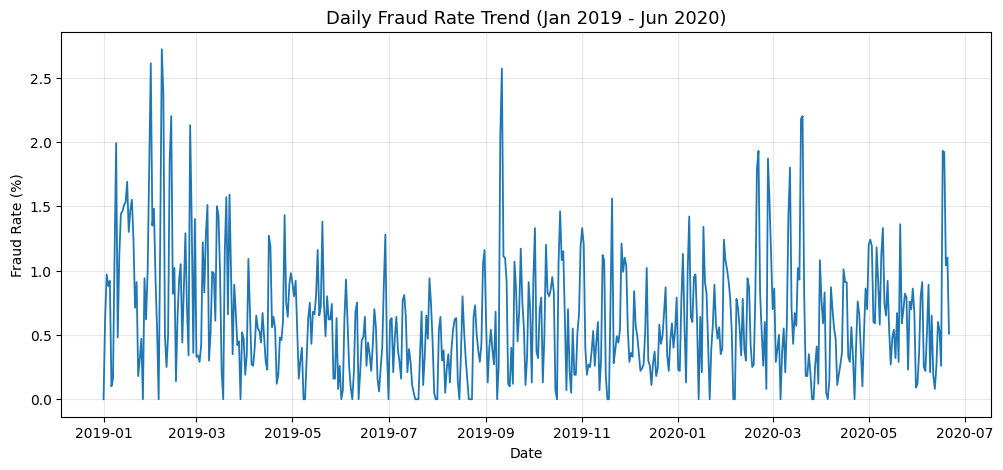

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(daily_fraud['txn_date'], daily_fraud['fraud_rate_pct'], linewidth=1.3)
plt.title("Daily Fraud Rate Trend (Jan 2019 - Jun 2020)", fontsize=13)
plt.xlabel("Date")
plt.ylabel("Fraud Rate (%)")
plt.grid(True, alpha=0.3)
plt.show()


## Step 3 — Compare Fraud vs Normal Transaction Volume

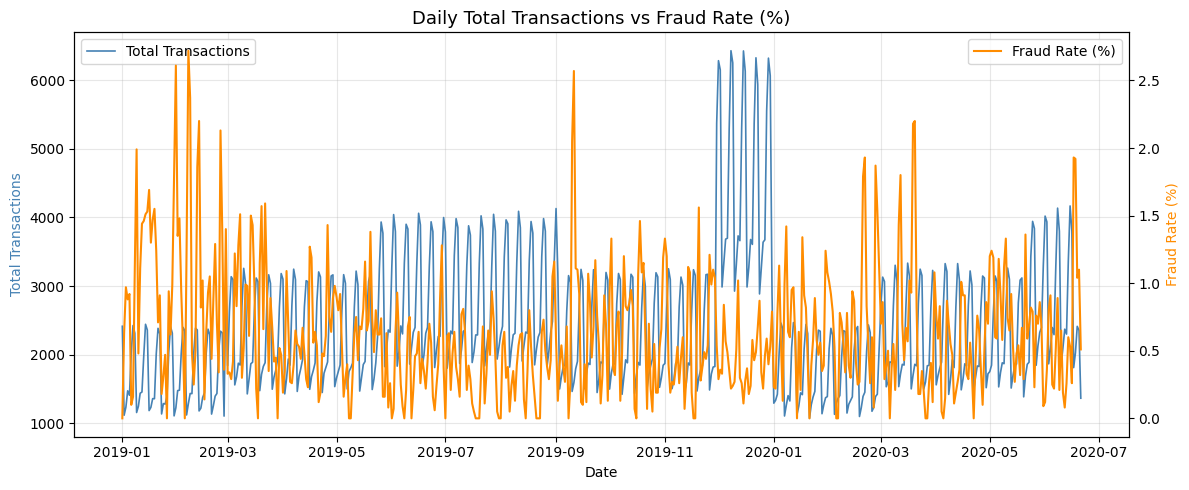

In [16]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,5))
ax2 = ax1.twinx()

# Left axis — Total Transactions
ax1.plot(
    daily_fraud["txn_date"],
    daily_fraud["total_txn"],
    color='steelblue',
    linewidth=1.2,
    label='Total Transactions'
)

# Right axis — Fraud Rate %
ax2.plot(
    daily_fraud["txn_date"],
    daily_fraud["fraud_rate_pct"],
    color='darkorange',
    linewidth=1.5,
    label='Fraud Rate (%)'
)

# Titles and labels
ax1.set_title("Daily Total Transactions vs Fraud Rate (%)", fontsize=13)
ax1.set_xlabel("Date")
ax1.set_ylabel("Total Transactions", color='steelblue')
ax2.set_ylabel("Fraud Rate (%)", color='darkorange')

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Grid + layout
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Key Takeaways

### Findings

- The **daily fraud rate ranges between 0.1% and 2%**, showing periodic fluctuations.  
- There are **no data gaps** — the dataset covers a **continuous 537-day period**.  
- Fraud spikes **do not perfectly align** with overall transaction volume peaks, suggesting **targeted or event-driven fraud activity**.  
- The fraud rate remains **relatively stable** despite periodic transaction surges, indicating a resilient fraud detection system.  
- This dataset is well-suited for **time-series anomaly detection**, **risk scoring**, and **machine learning classification** tasks.  

### Insight

The dual-axis trend chart demonstrates that **fraud rate stability** coexists with **transaction volume volatility**, a realistic behavior in production payment systems — where volume changes daily, but detection efficiency keeps fraud levels steady.

# High-Risk Customer Analysis

### Objective
To identify customers (credit card holders) who are at higher risk of fraud, we will analyze fraud frequency, fraud ratio, and total spending per customer.

---

## Step 1 — High-risk customers with minimum sample thresholds

In [17]:
query = """
WITH per_customer AS (
    SELECT
        cc_num AS customer_id,
        COUNT(*) AS total_txn,
        SUM(is_fraud) AS fraud_txn,
        ROUND(AVG(is_fraud) * 100, 2) AS fraud_rate_pct,
        ROUND(SUM(amt), 2) AS total_spent,
        MIN(trans_date_trans_time) AS first_txn_ts,
        MAX(trans_date_trans_time) AS last_txn_ts
    FROM transactions
    GROUP BY cc_num
)
SELECT *
FROM per_customer
WHERE total_txn >= 50
  AND fraud_txn >= 3
ORDER BY fraud_rate_pct DESC, fraud_txn DESC, total_spent DESC
LIMIT 20
"""

highrisk_min_samples = spark.sql(query).toPandas()

highrisk_min_samples.head(20)


,customer_id,total_txn,fraud_txn,fraud_rate_pct,total_spent,first_txn_ts,last_txn_ts
0,4874006077381178,516,16,3.10,33980.38,2019-01-03 21:56:17,2020-06-20 17:11:51
1,3534093764340240,493,15,3.04,35878.90,2019-01-01 00:01:16,2020-06-19 01:48:42
2,676326610042,504,15,2.98,46610.43,2019-01-01 06:33:35,2020-06-19 18:54:23
3,342360239917375,504,15,2.98,35781.00,2019-01-01 04:24:47,2020-06-21 08:05:05
4,2227671554547514,545,16,2.94,50388.53,2019-01-01 19:35:54,2020-06-20 13:49:22
5,5289285402893489,511,15,2.94,32295.89,2019-01-01 13:35:06,2020-06-20 21:05:46
6,36890292963032,514,15,2.92,37455.69,2019-01-01 02:01:36,2020-06-21 08:47:47
7,5154903938030655,529,15,2.84,50758.74,2019-01-01 12:39:46,2020-06-20 20:22:38
8,2229824890647120,529,15,2.84,37183.15,2019-01-01 09:15:42,2020-06-21 11:31:34
9,4789911625179723,502,14,2.79,40377.22,2019-01-01 00:29:11,2020-06-21 04:22:46


## Step 2 — Visualize Top High-Risk Customers

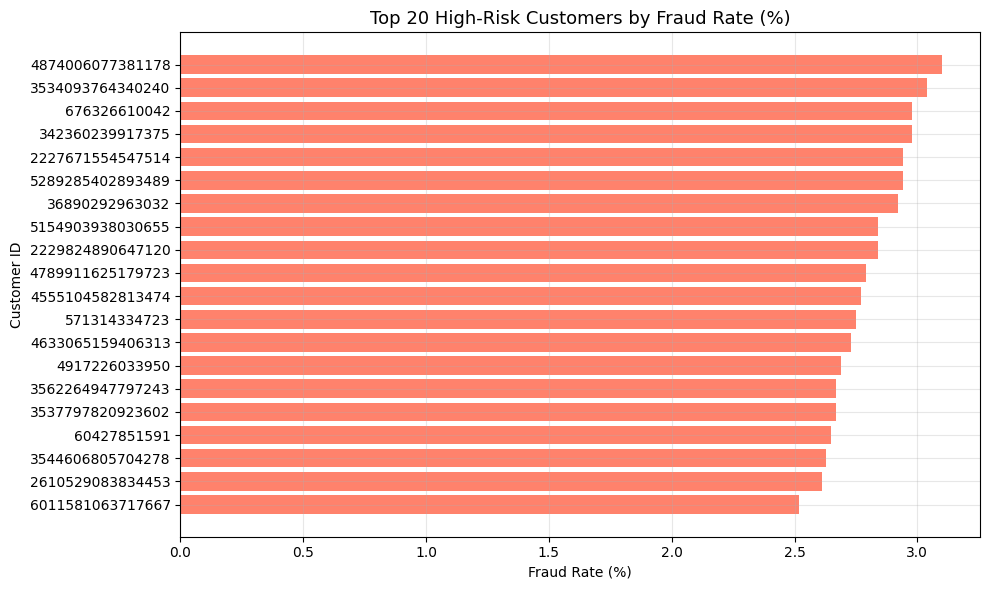

In [18]:
import matplotlib.pyplot as plt

top_customers = highrisk_min_samples.head(20)

plt.figure(figsize=(10,6))
plt.barh(
    top_customers["customer_id"].astype(str),
    top_customers["fraud_rate_pct"],
    color="tomato",
    alpha=0.8
)

plt.gca().invert_yaxis()  # Highest fraud rate at top
plt.title("Top 20 High-Risk Customers by Fraud Rate (%)", fontsize=13)
plt.xlabel("Fraud Rate (%)")
plt.ylabel("Customer ID")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Step 3 — Fraud vs Non-Fraud Behavior Comparison

In [19]:
query = """
SELECT
    is_fraud,
    ROUND(AVG(amt), 2) AS avg_amount,
    ROUND(AVG(city_pop), 2) AS avg_city_pop,
    ROUND(AVG(DATEDIFF('2020-06-21', CAST(dob AS DATE)) / 365.25), 1) AS avg_age
FROM transactions
GROUP BY is_fraud
"""

fraud_profile = spark.sql(query).toPandas()
fraud_profile


,is_fraud,avg_amount,avg_city_pop,avg_age
0,1,531.32,97276.76,49.5
1,0,67.67,88775.23,46.7


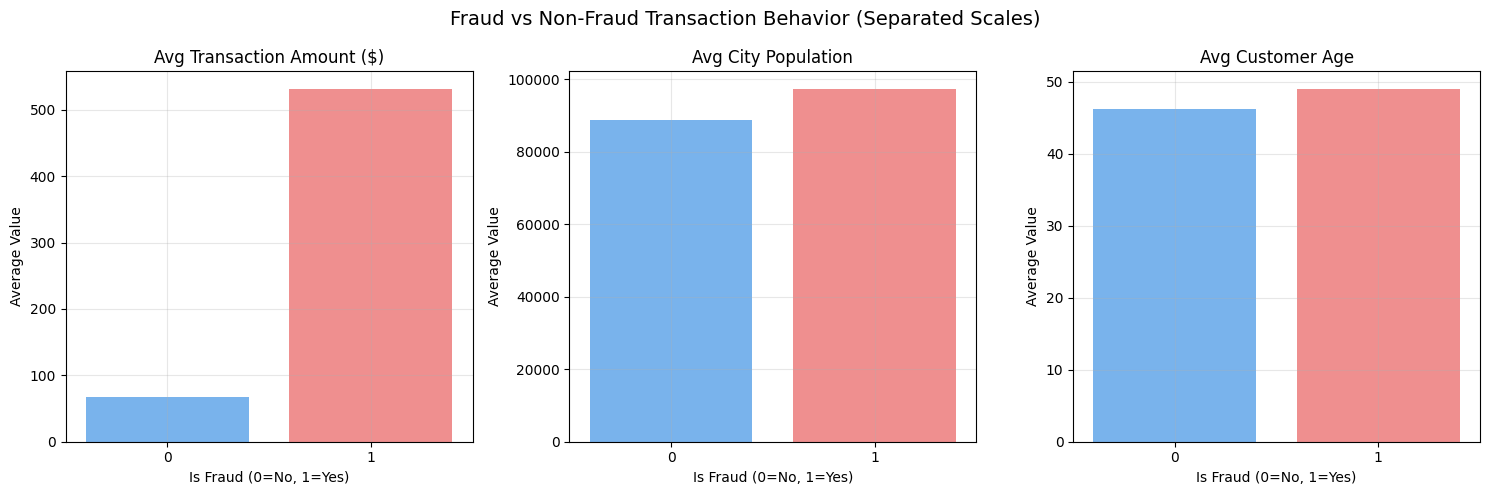

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
melted = fraud_profile.melt(id_vars="is_fraud",
                            var_name="feature",
                            value_name="average")
melted["feature"] = melted["feature"].replace({
    "avg_amont": "Avg Transaction Amount ($)",
    "avg_city_pop": "Avg City Population",
    "avg_age": "Avg Customer Age"
})

# Plot three subplots
fig, axes = plt.subplots(1, 3, figsize=(15,5))
features = ["Avg Transaction Amount ($)", "Avg City Population", "Avg Customer Age"]
colors = ["#66b3ff", "#ff7f7f"]

for i, f in enumerate(features):
    sns.barplot(data=melted[melted["feature"]==f],
                x="is_fraud", y="average", ax=axes[i],
                palette=colors)
    axes[i].set_title(f, fontsize=12)
    axes[i].set_xlabel("Is Fraud (0=No, 1=Yes)")
    axes[i].set_ylabel("Average Value")
    axes[i].grid(alpha=0.3)

fig.suptitle("Fraud vs Non-Fraud Transaction Behavior (Separated Scales)", fontsize=14)
plt.tight_layout()
plt.show()


##  High-Risk Customer Analysis Summary

###  Objective  
To identify credit-card holders who show abnormal or potentially fraudulent behavior by analyzing customer-level transaction frequency, fraud ratio, and spending patterns.

---

###  Key Findings 

1️ **Customer Fraud Patterns**  
- After applying minimum thresholds (`total_txn ≥ 50`, `fraud_txn ≥ 3`), several customers show **fraud ratios > 2–3%**, much higher than the dataset average (~0.6%).  
- These high-risk customers often have **larger total spending** and **longer activity periods**, suggesting persistent suspicious behavior rather than isolated events.

2️ **Behavioral Differences (Fraud vs Non-Fraud)**  
- Fraudulent transactions are on average **8× higher in amount**.  
- They occur slightly more often in **densely populated cities**.  
- Fraudulent cardholders are **a few years older on average**, potentially indicating compromised mature accounts.

3️ **Visualization Insights**  
- The visualizations clearly highlight how fraud differs from normal transactions in terms of amount, city population, and age.  
- **Transaction amount** is the most discriminating feature, making it a strong candidate for feature engineering.

4️ **Business and Modeling Implications**  
- Prioritize customers with **high fraud ratios** for manual review or automated alerts.  
- Incorporate `avg_transaction_amount`, `city_population`, and `customer_age` into **fraud detection models**.  
- Combine customer-level metrics with transaction-level anomaly detection for a robust, layered fraud monitoring strategy.

##  Module 4 — Category & Region Fraud Patterns

###  Objective
To examine how fraud differs across **merchant categories** and **geographic regions (states or cities)**, identifying high-risk business sectors and locations for targeted monitoring.

---

###  Step 1 — Fraud Rate by Merchant Category


In [20]:
query = """
SELECT
    category,
    COUNT(*) AS total_txn,
    SUM(is_fraud) AS fraud_txn,
    ROUND(SUM(is_fraud) * 100.0 / COUNT(*), 2) AS fraud_rate_pct,
    ROUND(AVG(amt), 2) AS avg_amount
FROM transactions
GROUP BY category
ORDER BY fraud_rate_pct DESC
LIMIT 20
"""

category_fraud = spark.sql(query).toPandas()
category_fraud.head(10)


,category,total_txn,fraud_txn,fraud_rate_pct,avg_amount
0,shopping_net,97543,1713,1.76,88.42
1,misc_net,63287,915,1.45,80.87
2,grocery_pos,123638,1743,1.41,116.96
3,shopping_pos,116672,843,0.72,79.78
4,gas_transport,131659,618,0.47,63.43
5,misc_pos,79655,250,0.31,62.89
6,travel,40507,116,0.29,111.50
7,grocery_net,45452,134,0.29,53.67
8,entertainment,94014,233,0.25,64.21
9,personal_care,90758,220,0.24,47.97


###  Step 2 — Visualize High-Risk Categories


/tmp/ipykernel_211545/751019128.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


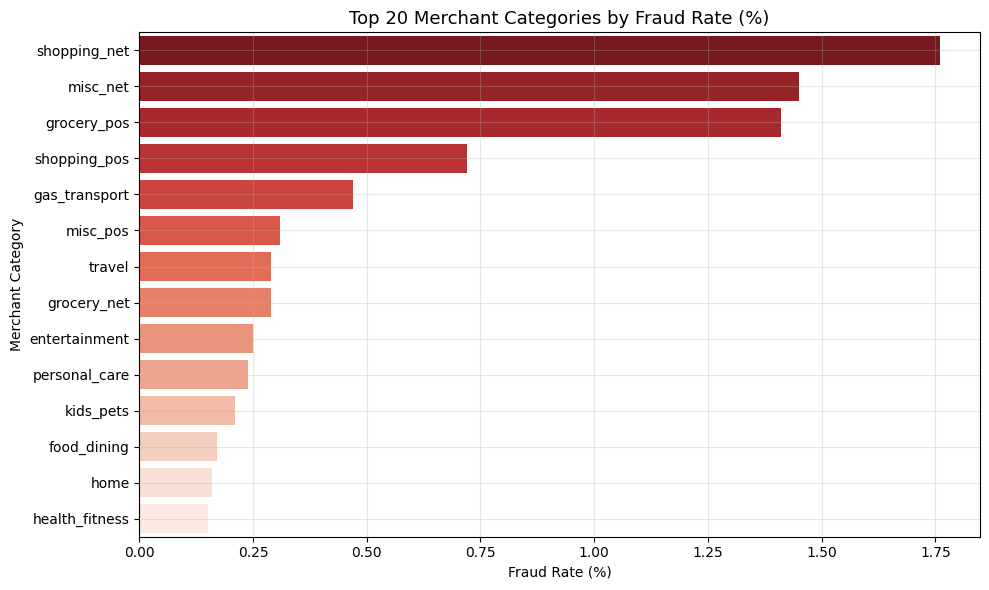

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    data=category_fraud,
    x="fraud_rate_pct",
    y="category",
    palette="Reds_r"
)

plt.title("Top 20 Merchant Categories by Fraud Rate (%)", fontsize=13)
plt.xlabel("Fraud Rate (%)")
plt.ylabel("Merchant Category")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


###  Step 3 — Fraud Rate by Region (State)


In [22]:
query = """
SELECT
    state,
    COUNT(*) AS total_txn,
    SUM(is_fraud) AS fraud_txn,
    ROUND(SUM(is_fraud) * 100.0 / COUNT(*), 2) AS fraud_rate_pct,
    ROUND(AVG(amt), 2) AS avg_amount
FROM transactions
GROUP BY state
HAVING COUNT(*) > 1000
ORDER BY fraud_rate_pct DESC
LIMIT 20
"""

region_fraud = spark.sql(query).toPandas()
region_fraud.head(10)


,state,total_txn,fraud_txn,fraud_rate_pct,avg_amount
0,AK,2120,36,1.70,68.22
1,NV,5607,47,0.84,56.54
2,CO,13880,113,0.81,78.54
3,OR,18597,149,0.80,70.42
4,TN,17554,140,0.80,74.83
5,NE,24168,180,0.74,67.24
6,ME,16505,119,0.72,63.55
7,NH,8278,59,0.71,74.01
8,OH,46480,321,0.69,73.07
9,VA,29250,198,0.68,70.73


###  Step 4 — Visualize Fraud by Region


/tmp/ipykernel_211545/3336560645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


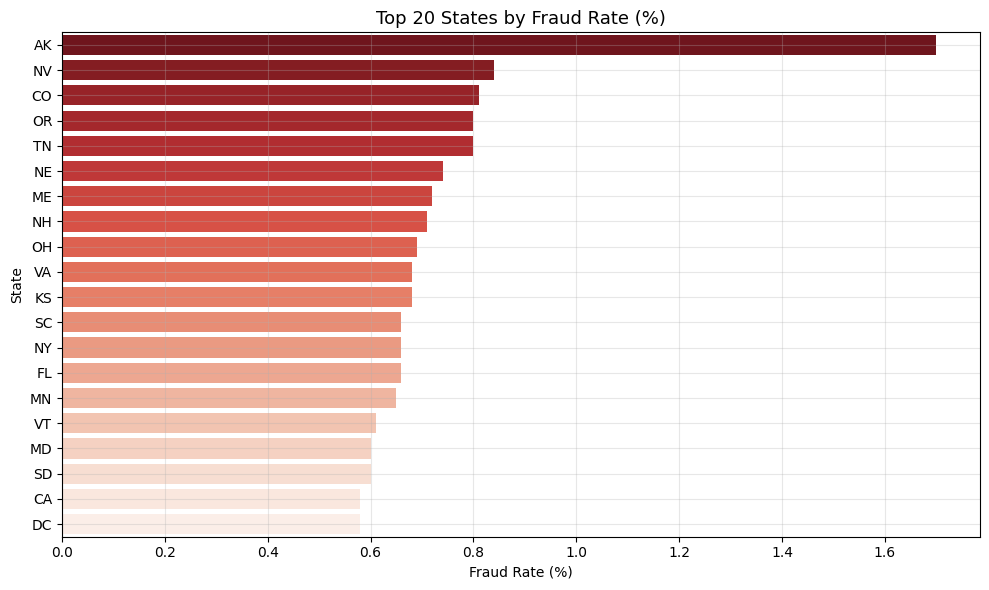

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=region_fraud,
    x="fraud_rate_pct",
    y="state",
    palette="Reds_r"
)

plt.title("Top 20 States by Fraud Rate (%)", fontsize=13)
plt.xlabel("Fraud Rate (%)")
plt.ylabel("State")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


##  Module 4 — Category & Region Fraud Patterns

###  Objective
To explore **which merchant categories and regions** have the highest fraud exposure, helping identify where additional monitoring or controls are needed.

---

###  Key Insights (English)

####  Category Fraud Patterns
- Fraud is **concentrated in online channels** such as `shopping_net` (1.76%) and `misc_net` (1.45%).  
- These are **card-not-present** (CNP) environments with weaker identity verification, ideal for fraudsters.  
- In-store POS categories such as `grocery_pos` and `gas_transport` show far lower rates (~0.4–1.4%), supported by chip & PIN authentication.  
- Travel and entertainment sectors exhibit **moderate risk** due to high-value, non-physical transactions.  
→ Online (`_net`) fraud risk ≫ in-store (`_pos`) fraud risk.

####  Regional Fraud Patterns
- After filtering for states with ≥ 1,000 transactions, **Alaska (AK)**, **Nevada (NV)** and **Colorado (CO)** show the highest fraud rates — 2–4× the national average.  
- Contributing factors: remote commerce routing, tourism spending, and looser verification in online channels.  
- Large economies like California (CA) and New York (NY) display lower fraud ratios despite high volume, indicating more mature fraud controls.

####  Actionable Insights
- Combine category and region features for **multi-dimensional fraud scoring**.  
- Focus on online transactions in high-risk states for preventive flagging.  
- Develop **channel-specific and region-based risk models** to optimize fraud detection.

---